In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from wordcloud import WordCloud

#### Импорт таблицы, которую я успешно спарсил и сохранил

In [2]:
df = pd.read_csv('Таблица.csv')
df

,Срок размещения объявления,Модель машины,Год выпуска,"Пробег, км","Цена машины, ₽",Тип машины,Привод,Тип бензина,Ссылка
0,5 часов назад,BMW X7 4.4 AT,2024,1,21900000,внедорожник,полный,бензин,https://www.avito.ru/moskva/avtomobili/bmw_x7_...
1,4 часа назад,BMW 7 серия 3.0 AT,2023,50,17000000,седан,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_7_s...
2,5 часов назад,BMW X7 3.0 AT,2024,1,16900000,внедорожник,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_x7_...
3,1 час назад,BMW XM 4.4 AT,2023,15,25490000,внедорожник,полный,гибрид,https://www.avito.ru/moskva/avtomobili/bmw_xm_...
4,5 дней назад,BMW X7 3.0 AT,2020,65 000,10190000,внедорожник,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_x7_...
...,...,...,...,...,...,...,...,...,...
4993,1 неделю назад,BMW 6 серия GT 2.0 AT,2020,83 252,5399000,лифтбек,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_6_s...
4994,4 дня назад,BMW 3 серия 2.0 AT,2014,139 000,2155000,седан,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_3_s...
4995,1 неделю назад,BMW 4 серия 2.0 AT,2014,83 549,2919700,купе,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_4_s...
4996,1 неделю назад,BMW 3 серия 2.0 AT,2019,44 260,3877140,седан,задний,бензин,https://www.avito.ru/moskva/avtomobili/bmw_3_s...


In [3]:
df.describe() 

,Год выпуска,"Цена машины, ₽"
count,4998.000000,4.998000e+03
mean,2017.544418,5.889897e+06
std,4.953408,5.047929e+06
min,1944.000000,1.150000e+05
25%,2014.000000,2.218250e+06
50%,2019.000000,3.990000e+06
75%,2021.000000,7.750000e+06
max,2024.000000,3.200000e+07


Поработаем с данными

In [4]:
missing_values = df.isna().sum()
print(missing_values)
#нет строк с пропущенными данными

Срок размещения объявления    0
Модель машины                 0
Год выпуска                   0
Пробег, км                    0
Цена машины, ₽                0
Тип машины                    0
Привод                        0
Тип бензина                   0
Ссылка                        0
dtype: int64


Удалим самые сильные выбросы:

In [5]:
df = df.drop(df[df['Цена машины, ₽'] == df['Цена машины, ₽'].max()].index)
df = df.drop(df[df['Пробег, км'] == df['Пробег, км'].max()].index)

#### Посмотрим, какие уникальные значения встречаются в столбцах тип машины, привод, тип бензина и их количество:

In [6]:
df["Тип машины"].nunique()

8

In [7]:
print(df["Тип машины"].value_counts())

Тип машины
внедорожник    2625
седан          1734
купе            175
лифтбек         157
хетчбэк         145
универсал        81
кабриолет        64
минивэн          14
Name: count, dtype: int64


In [8]:
print(df["Привод"].value_counts())

Привод
полный      3866
задний      1014
передний     115
Name: count, dtype: int64


In [9]:
print(df["Тип бензина"].value_counts())

Тип бензина
дизель     2575
бензин     2289
гибрид       72
электро      59
Name: count, dtype: int64


Построим график взаимосвязи цены машины с пробегом:

In [10]:
#сначала преобразуем даннные в числовой формат

In [11]:
for index, value in df["Пробег, км"].items():
    if isinstance(value, int):
        a = value
    else:
        a = int(value.replace('\xa0', ''))
    df.loc[index, "Пробег, км"] = a
    
for index, value in df["Цена машины, ₽"].items():
    if isinstance(value, int):
        b = value
    else:
        b = int(value.replace('\xa0', ''))
    df.loc[index, "Цена машины, ₽"] = b

In [12]:
#построение графика

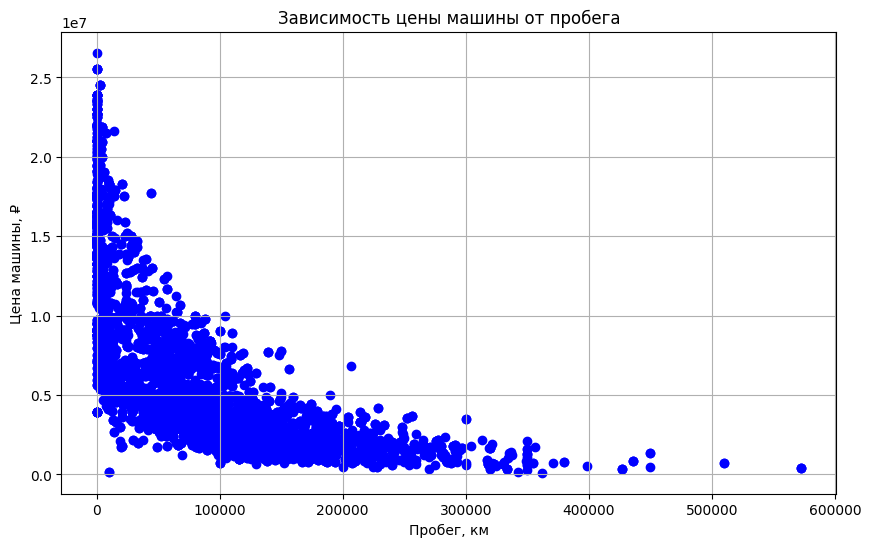

Видна сильная отрицательная корреляция


In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df["Пробег, км"], df["Цена машины, ₽"], color='b')
plt.title('Зависимость цены машины от пробега')
plt.xlabel('Пробег, км')
plt.ylabel('Цена машины, ₽')
plt.grid(True)
plt.show()
print("Видна сильная отрицательная корреляция")

In [14]:
#найдём корреляцию

In [15]:
r = statistics.correlation(df["Пробег, км"], df["Цена машины, ₽"])
print(r)
print("Так и есть, сильная отрицательная корреляция")

-0.6865676952605334
Так и есть, сильная отрицательная корреляция


In [16]:
#построим гистограмму распределения машин по типу бензина, чтобы наглядно посмотреть на доли

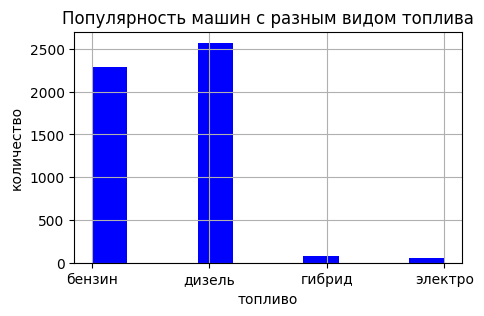

Мы видим явное преобладание дизельных и бензиновых автомобилей на рынке авито, вследствии чего можно сделать вывод о непопулярности в смешанных типов маших и электрокаров


In [17]:
plt.figure(figsize=(5,3))
plt.hist(df["Тип бензина"], color='b')
plt.title('Популярность машин с разным видом топлива')
plt.xlabel('топливо')
plt.ylabel("количество")
plt.grid(True)
plt.show()
print("Мы видим явное преобладание дизельных и бензиновых автомобилей на рынке авито, вследствии чего можно сделать вывод о непопулярности в смешанных типов маших и электрокаров")

Также мне интересна взаимосвязь между годом выпуска и ценой. По идее корреляция должна быть положительная, а потом переходить в отрийательную (раритетные авто)

In [18]:
g = statistics.correlation(df["Год выпуска"], df["Цена машины, ₽"])
print(g)
print("Так и есть, видна сильная положительная корреляция")


0.6870497155441124
Так и есть, видна сильная положительная корреляция


Скорее всего, мы не увидели случаев с раритетными авто, тк на момент 2024 года их продают на отдельных платформах, а не на авито

C:\Users\Home\AppData\Local\Temp\ipykernel_19332\3814280094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Год выпуска', y='Цена машины, ₽', data=df, palette=colors)


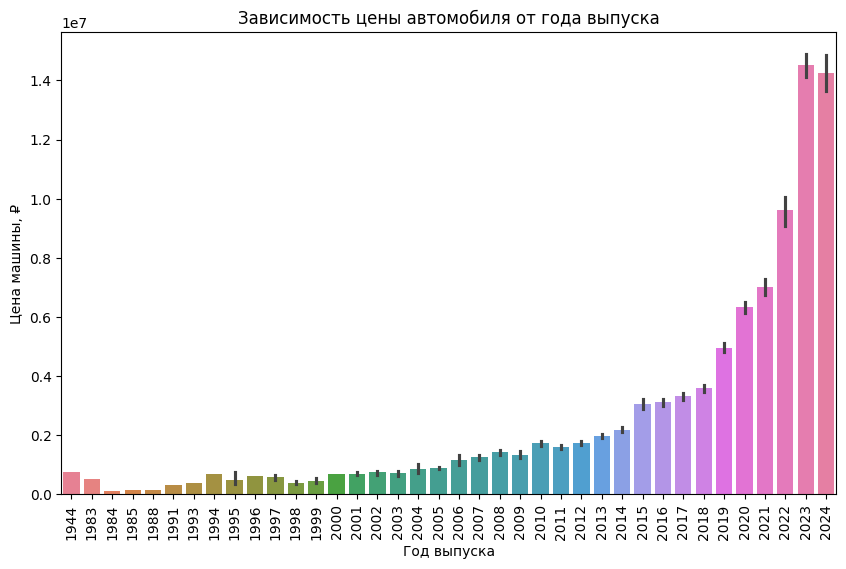

In [19]:
colors = sns.color_palette("husl", len(df['Год выпуска'].unique())) #такой цвет я сделал с помощью чат гпт, он помог мне узнать о существовании такой палитры как husl для более хорошего оформления графиков
plt.figure(figsize=(10, 6))
sns.barplot(x='Год выпуска', y='Цена машины, ₽', data=df, palette=colors)
plt.xticks(rotation=90)
plt.title('Зависимость цены автомобиля от года выпуска')
plt.show()


**Вывод:** Наблюдается тенденция увеличения средней стоимости автомобилей с увеличением года выпуска, что означает, что новые машины обычно дороже. Однако иногда данная тенденция нарушается. Это может быть связано с повышением цен на определенные модели, которые представляют особую ценность, а также их ограниченным количеством на рынке. Например, на рынке выставлен всего один (видно на предыдущем графике) редкий автомобиль 1944 года выпуска.

In [20]:
df[df['Год выпуска'] == 1944]

,Срок размещения объявления,Модель машины,Год выпуска,"Пробег, км","Цена машины, ₽",Тип машины,Привод,Тип бензина,Ссылка
1062,5 дней назад,BMW 326 2.0 MT,1944,321000,750000,седан,задний,бензин,https://www.avito.ru/moskva/avtomobili/bmw_326...


### Чтобы построить следующий график, необходимо поработать со сроком размещения объявления

###### Для начала узнает количество уникальных элементов в df["Срок размещения объявления"]

In [21]:
unique = {}
for index, i in df["Срок размещения объявления"].items():
    i = i.split(" ")
    if i[1] not in unique.keys():
        unique[i[1]] = 1
    else:
        unique[i[1]] += 1
    if i[1] == "марта":
        print(i)
print(unique)

['29', 'марта', '18:27']
{'часов': 436, 'часа': 384, 'час': 127, 'дней': 834, 'день': 903, 'дня': 1439, 'минуты': 29, 'неделю': 675, 'минут': 19, 'недели': 146, 'секунд': 2, 'марта': 1}


In [22]:
for index, i in df["Срок размещения объявления"].items():
    s = i.split(" ")
    if s[1] == "час" or s[1] == "часов" or s[1] == "часа" or s[1] == "минуты" or s[1] == "минута" or s[1] == "минут" or s[1] == "секунды" or s[1] == "секунда" or s[1] == "секунд":
        a = 0
    elif s[1] == "день" or s[1] == "дня" or s[1] == "дней":
        a = int(s[0])
    elif s[1] == "неделю" or s[1] == "недели" or s[1] == "недель":
        a = int(s[0]) * 7
    elif s[1] == "месяц" or s[1] == "месяца" or s[1] == "месяцев":
        a == int(s[0]) * 31 
    else:
        a = "больше месяца назад"
        
    if a != "больше месяца назад":
        df.loc[index, "Срок размещения объявления"] = int(a)
    else:
        df.drop(index, inplace=True)

In [23]:
df = df.rename(columns={'Срок размещения объявления': 'Срок размещения объявления (дней)'})

In [24]:
df

,Срок размещения объявления (дней),Модель машины,Год выпуска,"Пробег, км","Цена машины, ₽",Тип машины,Привод,Тип бензина,Ссылка
0,0,BMW X7 4.4 AT,2024,1,21900000,внедорожник,полный,бензин,https://www.avito.ru/moskva/avtomobili/bmw_x7_...
1,0,BMW 7 серия 3.0 AT,2023,50,17000000,седан,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_7_s...
2,0,BMW X7 3.0 AT,2024,1,16900000,внедорожник,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_x7_...
3,0,BMW XM 4.4 AT,2023,15,25490000,внедорожник,полный,гибрид,https://www.avito.ru/moskva/avtomobili/bmw_xm_...
4,5,BMW X7 3.0 AT,2020,65000,10190000,внедорожник,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_x7_...
...,...,...,...,...,...,...,...,...,...
4993,7,BMW 6 серия GT 2.0 AT,2020,83252,5399000,лифтбек,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_6_s...
4994,4,BMW 3 серия 2.0 AT,2014,139000,2155000,седан,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_3_s...
4995,7,BMW 4 серия 2.0 AT,2014,83549,2919700,купе,полный,дизель,https://www.avito.ru/moskva/avtomobili/bmw_4_s...
4996,7,BMW 3 серия 2.0 AT,2019,44260,3877140,седан,задний,бензин,https://www.avito.ru/moskva/avtomobili/bmw_3_s...


Построим график зависимости цены машины от времени размещения объявления. Мне кажется, что чем дольше объявление висит, тем ниже будет цена.

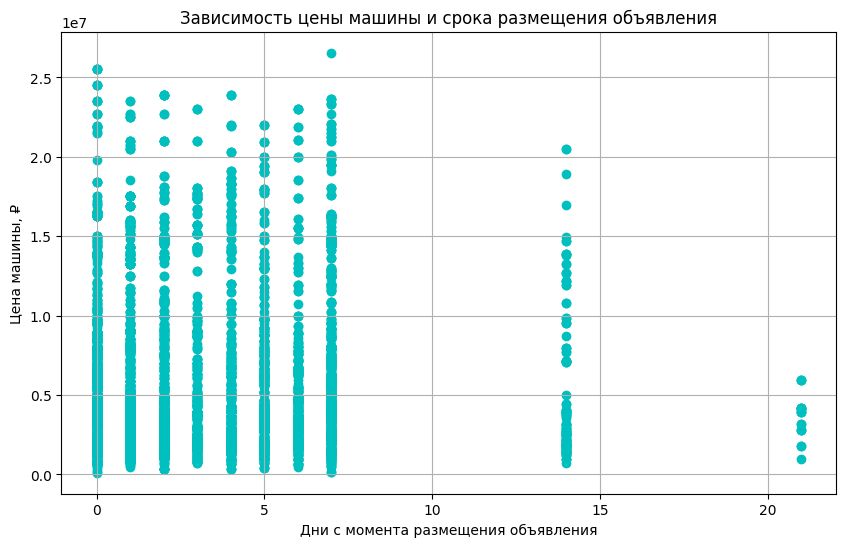

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df["Срок размещения объявления (дней)"], df["Цена машины, ₽"], color='c')
plt.title('Зависимость цены машины и срока размещения объявления')
plt.xlabel('Дни с момента размещения объявления')
plt.ylabel('Цена машины, ₽')
plt.grid(True)

В первую неделю показатели +- равные (24 млн руб) за исключением отдельных выбросов. На вторую неделю максимальная цена едва превышает 20 млн руб, а на третьеё неделе максимальная цена в районе 6 млн руб. Такое может происходить из-за того, что авито скрывает большинство старых объявлений, потому что людям они не интересны. Либо же на авито большой спрос и машины так долго не висят в продаже.

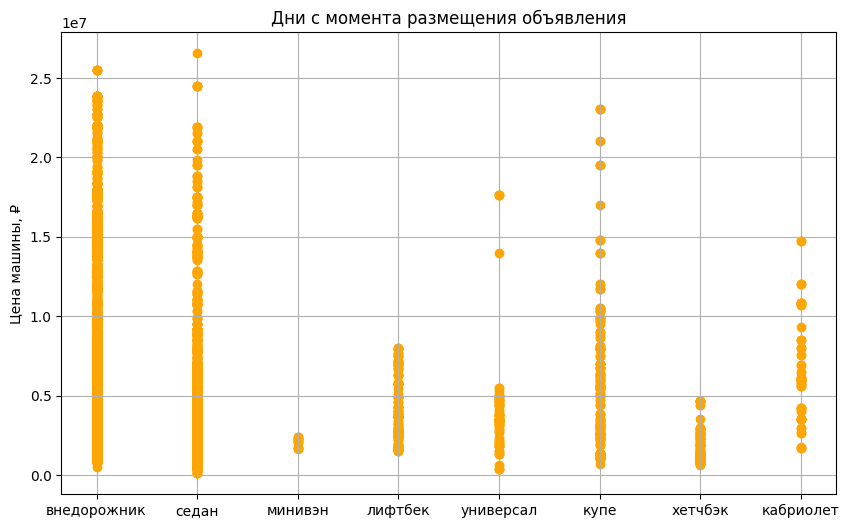

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df["Тип машины"], df["Цена машины, ₽"], color='orange')
plt.title('Дни с момента размещения объявления')
plt.xlabel('')
plt.ylabel('Цена машины, ₽')
plt.grid(True)

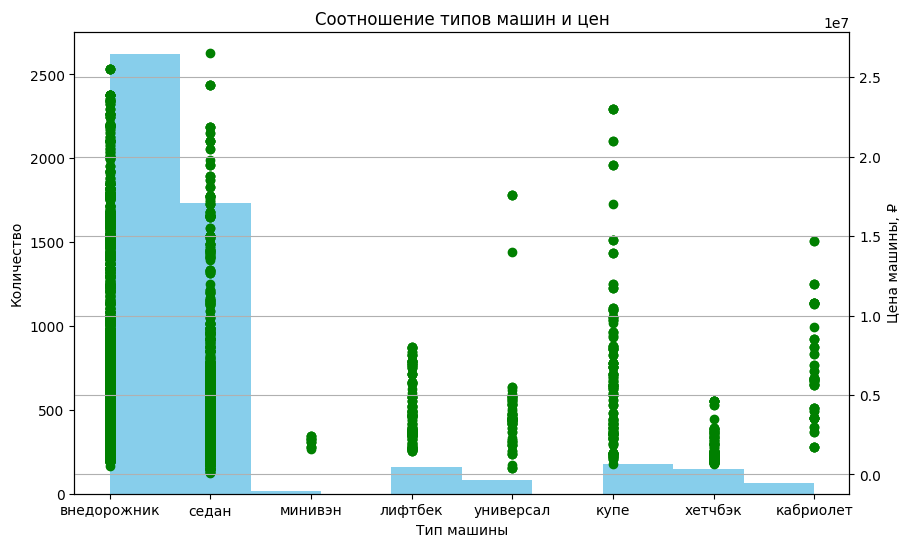

In [27]:
#я посторил два этих графиака по отдельности, но мне очень сильно захотелось для наглядости, чтобы они лежали друг на друге и я воспользовался чатом гпт, удалил ненужное и получил эту красоту. По факту он мне показал функцию twinx() для создания второй оси Y для цены машины.
fig, ax1 = plt.subplots(figsize=(10,6)) 

ax1.set_xlabel('Тип машины')
ax1.set_ylabel('Количество')
ax1.hist(df["Тип машины"], color='skyblue')

ax2 = ax1.twinx()
ax2.set_ylabel('Цена машины, ₽')
ax2.scatter(df["Тип машины"], df["Цена машины, ₽"], color='green')

plt.title('Соотношение типов машин и цен')
plt.grid(True)

На графике видно, что внедорожников на авито продаётся больше, чем всех остальных машин. Но по цене седаны, хоть срених них выборка меньше, стоят выше внедорожников. Количество купе не сильно отличается от других, но средняя цена и максимальная цена такого авто сильно выше, чем у тех же лифтбеков, кабриолетов и тд. 


Text(0.5, 0.92, 'Зависимость цены машины от пробега и года выпуска')

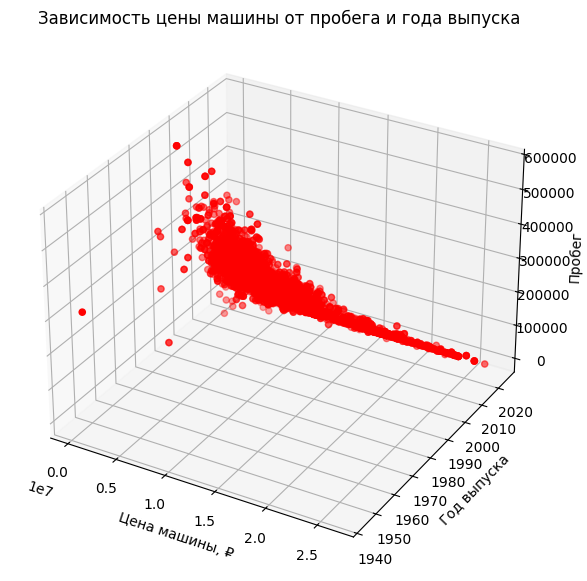

In [28]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Цена машины, ₽'], df['Год выпуска'], df['Пробег, км'], color='red')
plt.xlabel('Цена машины, ₽')
plt.ylabel('Год выпуска')
ax.set_zlabel('Пробег')
plt.title('Зависимость цены машины от пробега и года выпуска')


Всё такде видна отрицательная взаимосвязь цены с пробегом и положительная с годом выпуска. Наглядно видно, что при незначительном увеличении пробега цена сильно снижается, чего нельзя сказать про год выпуска - он практическо не сказывается за исключением 2-3х случаев из практически 5000 анализируемых объявлений

In [1]:
sns.boxplot(df["Пробег, км"],color='blue')
plt.title("Ящик с усами для пробга автомобилей")
plt.ylabel("Пробег, км")
plt.grid(True)

NameError: name 'sns' is not defined

Можно заметить, что среднее значение пробега равно 90 000 км. Довольно много наблюдений выходит за границу верхнего квантиля, что свидетельтвует о большом количестве выбросов в данных

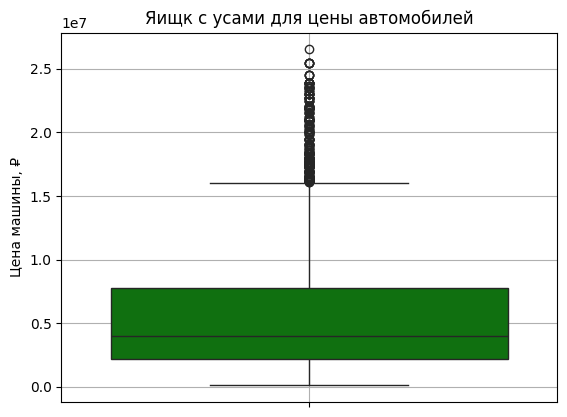

In [30]:
sns.boxplot(df["Цена машины, ₽"],color='green')
plt.title("Яищк с усами для цены автомобилей")
plt.ylabel("Цена машины, ₽")
plt.grid(True)

Здесь видно, что у нас ещё больше выбросов. Максимальное значение составляет примерно 27,5 млн. руб, что в 61 раз больше среднего значения (450 тыс. руб)

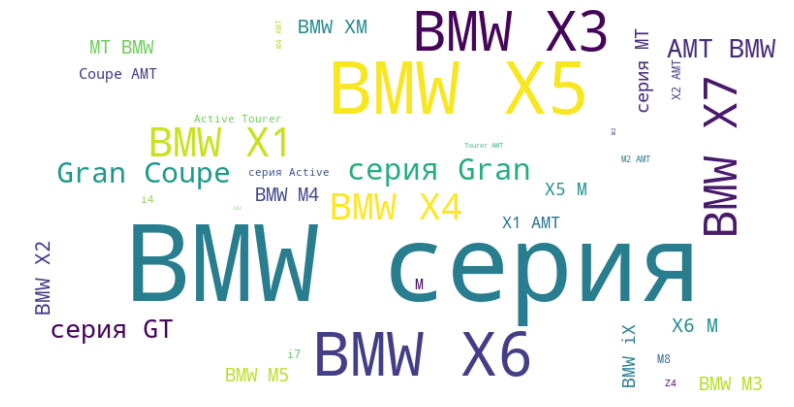

In [31]:
text = ' '.join(df['Модель машины'].astype(str))

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

plt.figure(figsize=[10,6])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [32]:
print(df["Модель машины"].value_counts())

Модель машины
BMW X5 3.0 AT         721
BMW 5 серия 2.0 AT    631
BMW X6 3.0 AT         479
BMW 3 серия 2.0 AT    444
BMW X3 2.0 AT         328
                     ... 
BMW 5 серия 2.8 MT      1
BMW M6 5.0 AMT          1
BMW 3 серия 1.8 MT      1
BMW i3 AT               1
BMW 326 2.0 MT          1
Name: count, Length: 104, dtype: int64


In [37]:
df.to_csv('ТаблицаПреобраз.csv', index=False) #сохранение таблицы в csv формат без индексации слева (иначе потом при обращении к таблице возникает двойная индексация)